In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The data

In [2]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exploratory Data Analysis

First I want to know where we are missing data

In [5]:
total = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


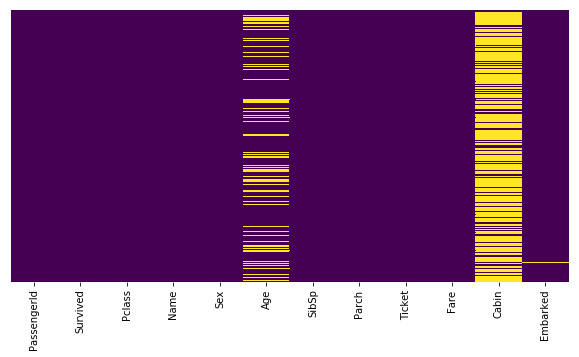

In [6]:
fig = plt.figure(figsize=(10,5))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis' )
plt.show()

Age column is missing a small portion of data, while Cabin column is missing a large amount of data that we can barely do anything useful. We will replace missing data in Age column with some form of proper imputation.

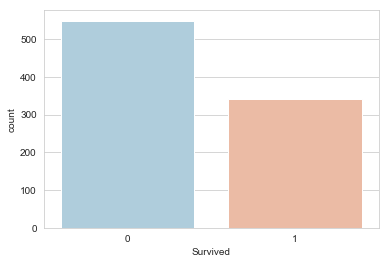

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, palette='RdBu_r')
plt.show()

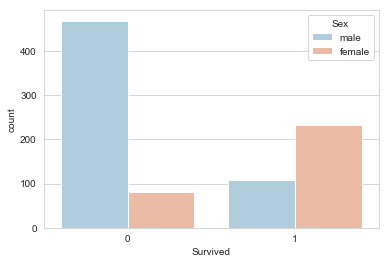

In [8]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')

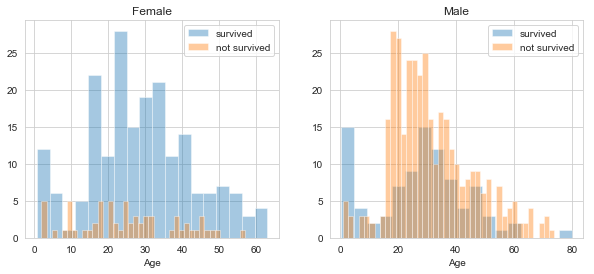

In [9]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')
plt.show()

Seems like if you were male, you are more likely to die in this tragedy.

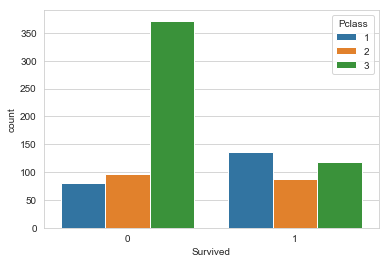

In [10]:
sns.countplot(x='Survived', data=train, hue='Pclass')

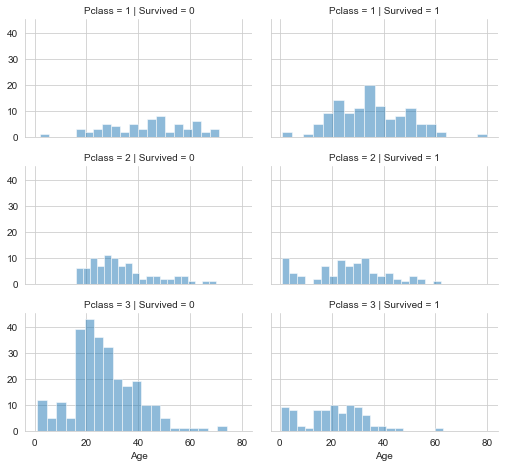

In [11]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

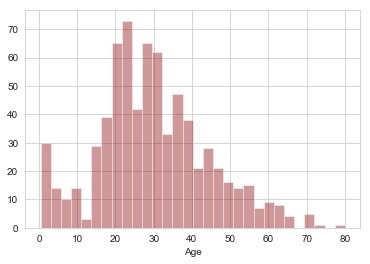

In [12]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)
plt.show()

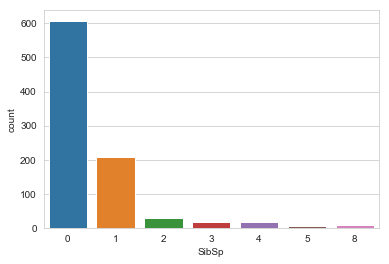

In [13]:
sns.countplot(x='SibSp',data=train)
plt.show()

## Data cleaning

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class.

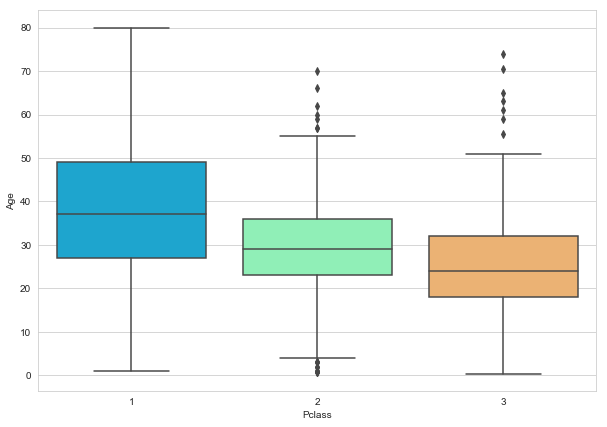

In [14]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='rainbow')
plt.show()

looks like the average age for class 1 is 37, for class 2 is 29 and 24 for class 3

In [15]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
        
    else:
        return Age
    

In [16]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

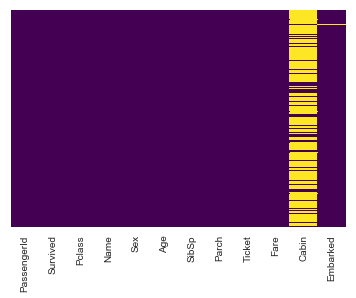

In [17]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Now we filled the age column according to that passenger's Pclass. We deemed Cabin column beyond repair, so we will drop that column.

In [18]:
train.drop('Cabin', inplace=True, axis=1)

In [19]:
train.dropna(inplace=True)

## Feature engineering

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Feature 1: turn sex to numeric variables

In [21]:
gender = {'male': 0, 'female':1}
train['Gender'] = train['Sex'].map(gender)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


Feature 2: turn Embarked feature to numeric

In [22]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [23]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [24]:
train = pd.concat([train,embark],axis=1)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Q,S
0,1,0,3,22.0,1,0,7.2500,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,1


Feature 3: turn categorical Pclass into dummies

In [26]:
Passclass = pd.get_dummies(train['Pclass'],drop_first=True)
train = pd.concat([train,Passclass],axis=1)

In [27]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Q,S,2,3
0,1,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,1,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,1,0,0
4,5,0,3,35.0,0,0,8.0500,0,0,1,0,1


Feature 4: age times pclass

In [29]:
train['Age_class'] = train['Age'] * train['Pclass']
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Q,S,2,3,Age_class
0,1,0,3,22.0,1,0,7.2500,0,0,1,0,1,66.0
1,2,1,1,38.0,1,0,71.2833,1,0,0,0,0,38.0
2,3,1,3,26.0,0,0,7.9250,1,0,1,0,1,78.0
3,4,1,1,35.0,1,0,53.1000,1,0,1,0,0,35.0
4,5,0,3,35.0,0,0,8.0500,0,0,1,0,1,105.0


Feature 5: relatives

In [31]:
train['Relatives'] = train['SibSp'] + train['Parch']

Feature 6: fare per person

In [32]:
train['Fare_Per_Person'] = train['Fare'] / (train['Relatives'] + 1)

In [33]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Q,S,2,3,Age_class,Relatives,Fare_Per_Person
0,1,0,3,22.0,1,0,7.2500,0,0,1,0,1,66.0,1,3.62500
1,2,1,1,38.0,1,0,71.2833,1,0,0,0,0,38.0,1,35.64165
2,3,1,3,26.0,0,0,7.9250,1,0,1,0,1,78.0,0,7.92500
3,4,1,1,35.0,1,0,53.1000,1,0,1,0,0,35.0,1,26.55000
4,5,0,3,35.0,0,0,8.0500,0,0,1,0,1,105.0,0,8.05000
